Group Members: Marisa Long and Anna Schoeny
ADD LINK TO GITHUB
## Topic: Alzheimer's Disease Datasets CHANGE NAME

First, some set up:
NOTE: This only needs to be run if running this on google collab, not locally.

In [12]:
# Mounting to drive and changing into our final tutorial folder
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/cmps3160
!git pull
%cd _finaltutorial

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/cmps3160
Already up to date.
/content/drive/My Drive/cmps3160/_finaltutorial


#### REMINDER: 
Make sure to **PULL** before working. Also, **PUSH** work when you do something meaningful!

In [4]:
# this is just to double check that you are in the correct directory
!pwd

/Users/marisamlong/Desktop/Tulane/cmps3160/_finaltutorial/marisalong.github.io


In [31]:
# importing necessary libraries for the analyzing the data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Dataset 1: Alhzeimer's Disease and Healthy Aging 
Data from the CDC

In [35]:
# Read in the data 
df_alhz_aging = pd.read_csv('./data/Alzheimer_s_Disease_and_Healthy_Aging_Data.csv')

df_alhz_aging.head()

/var/folders/yl/75wgtm7150z47_cyg623kjxh0000gn/T/ipykernel_54518/2759021523.py:2: DtypeWarning: Columns (17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df_alhz_aging = pd.read_csv('./data/Alzheimer_s_Disease_and_Healthy_Aging_Data.csv')


,RowId,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Response,...,QuestionID,ResponseID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3,Report
0,NaN,2020,2020,HI,Hawaii,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,NaN,...,Q43,NaN,15,AGE,5064,OVERALL,OVERALL,NaN,NaN,NaN
1,NaN,2017,2017,ID,Idaho,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,NaN,...,Q27,NaN,16,AGE,5064,OVERALL,OVERALL,NaN,NaN,NaN
2,NaN,2017,2017,ID,Idaho,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,NaN,...,Q43,NaN,16,AGE,5064,OVERALL,OVERALL,NaN,NaN,NaN
3,NaN,2018,2018,ID,Idaho,BRFSS,Overall Health,Physically unhealthy days (mean number of days),Physically unhealthy days (mean number of days...,NaN,...,Q08,NaN,16,AGE,5064,OVERALL,OVERALL,NaN,NaN,NaN
4,NaN,2020,2020,IN,Indiana,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,NaN,...,Q27,NaN,18,AGE,AGE_OVERALL,GENDER,MALE,NaN,NaN,NaN


In [33]:
# Cleaning column 18 to make all data types floats
df_alhz_aging["High_Confidence_Limit"] = df_alhz_aging["High_Confidence_Limit"].replace('.', np.nan)
df_alhz_aging["High_Confidence_Limit"] = df_alhz_aging["High_Confidence_Limit"].fillna(-1)
df_alhz_aging["High_Confidence_Limit"] = df_alhz_aging["High_Confidence_Limit"].astype(float)
df_alhz_aging["High_Confidence_Limit"] = df_alhz_aging["High_Confidence_Limit"].replace(-1, np.nan)

# Cleaning column 17 to make all data types floats
df_alhz_aging["Low_Confidence_Limit"] = df_alhz_aging["Low_Confidence_Limit"].replace('.', np.nan)
df_alhz_aging["Low_Confidence_Limit"] = df_alhz_aging["Low_Confidence_Limit"].fillna(-1)
df_alhz_aging["Low_Confidence_Limit"] = df_alhz_aging["Low_Confidence_Limit"].astype(float)
df_alhz_aging["Low_Confidence_Limit"] = df_alhz_aging["Low_Confidence_Limit"].replace(-1, np.nan)


In [40]:
df_alhz_aging.dtypes

RowId                         float64
YearStart                       int64
YearEnd                         int64
LocationAbbr                   object
LocationDesc                   object
Datasource                     object
Class                          object
Topic                          object
Question                       object
Response                      float64
Data_Value_Unit                object
DataValueTypeID                object
Data_Value_Type                object
Data_Value                    float64
Data_Value_Alt                float64
Data_Value_Footnote_Symbol     object
Data_Value_Footnote            object
Low_Confidence_Limit           object
High_Confidence_Limit         float64
Sample_Size                   float64
StratificationCategory1        object
Stratification1                object
StratificationCategory2        object
Stratification2                object
StratificationCategory3       float64
Stratification3               float64
Geolocation 

<AxesSubplot: >

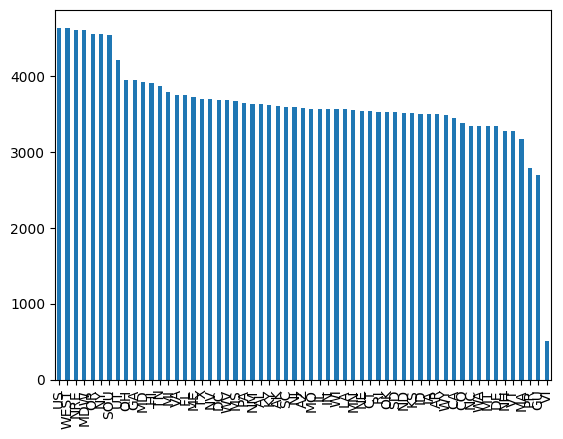

In [8]:
# Playing around with the data
df_alhz_aging['LocationAbbr'].value_counts().plot.bar()

### Dataset 2: MRI and Alzheimer's
Data from OASIS project

In [4]:
# Read in the longitudinal data
df_mri_alhz_long = pd.read_csv('./data/oasis_longitudinal.csv')
df_mri_alhz_long.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [5]:
# Read in the cross-sectional data
df_mri_alhz_cross = pd.read_csv('./data/oasis_cross-sectional.csv')
df_mri_alhz_cross.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN


In [ ]:
change